In [1]:
import molsysmt as msm
import mdtraj as md
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

# Potential Energy

In [2]:
traj = md.open('traj_2.h5')

In [3]:
traj.seek(0)

potential_energy = []
time = []

for frame_index in tqdm(range(104000)):
    frame = traj.read(n_frames=1)
    potential_energy.append(frame.potentialEnergy[0])
    time.append(frame.time[0])

100%|██████████| 104000/104000 [02:04<00:00, 836.94it/s]


In [4]:
len(potential_energy)

104000

In [5]:
len(time)

104000

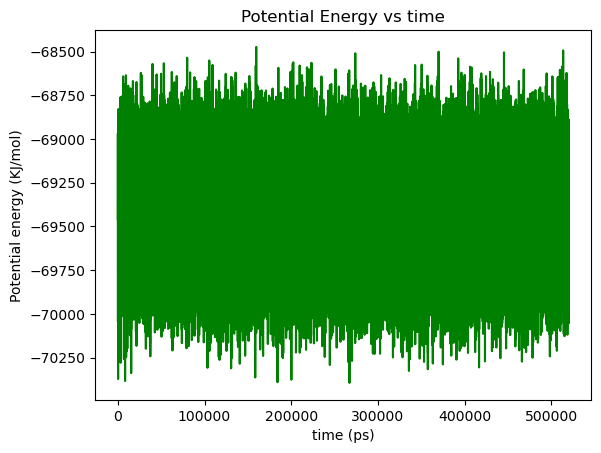

In [6]:
plt.plot(time, potential_energy, color='green')

plt.title('Potential Energy vs time')
plt.xlabel('time (ps)')
plt.ylabel('Potential energy (KJ/mol)')
plt.show()

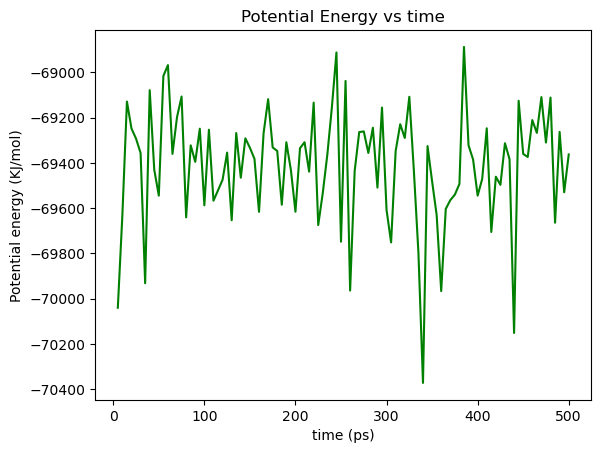

In [7]:
plt.plot(time[0:100], potential_energy[0:100], color='green')

plt.title('Potential Energy vs time')
plt.xlabel('time (ps)')
plt.ylabel('Potential energy (KJ/mol)')
plt.show()

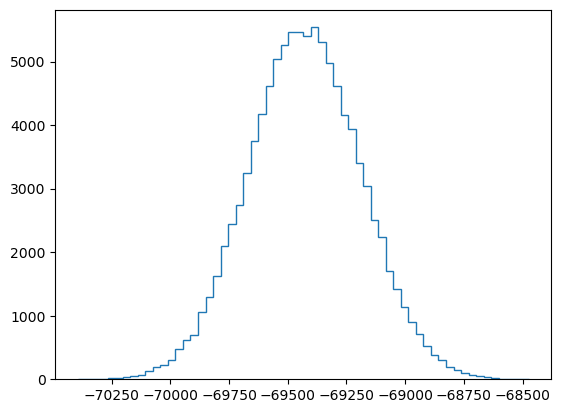

In [8]:
counts, bins = np.histogram(potential_energy, 60)
plt.stairs(counts, bins)

# Temperature

In [9]:
traj.seek(0)

temperature = []
time = []

for frame_index in tqdm(range(104000)):
    frame = traj.read(n_frames=1)
    temperature.append(frame.temperature[0])
    time.append(frame.time[0])

100%|██████████| 104000/104000 [02:03<00:00, 840.32it/s]


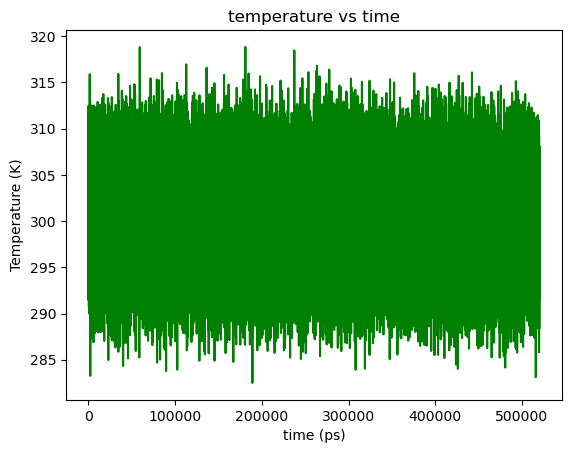

In [10]:
plt.plot(time, temperature, color='green')

plt.title('temperature vs time')
plt.xlabel('time (ps)')
plt.ylabel('Temperature (K)')
plt.show()

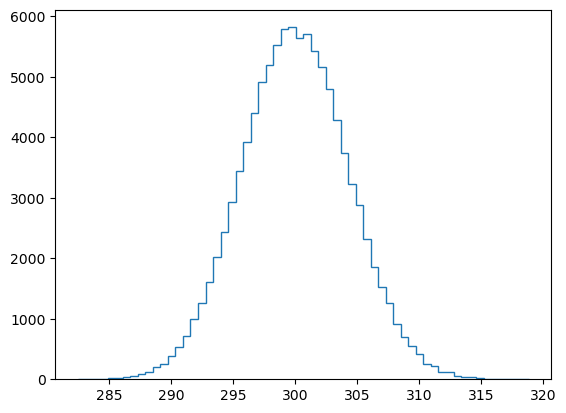

In [11]:
counts, bins = np.histogram(temperature, 60)
plt.stairs(counts, bins)

In [12]:
np.mean(temperature)

300.01382

In [13]:
np.std(temperature)

4.2944107

# Ree

In [14]:
topology = md.load_topology('traj.h5')

In [15]:
topology.select("resname ACE and name C")

array([0])

In [16]:
topology.select("resname NME and name C")

array([176])

In [17]:
traj.seek(0)

ree = []
time = []

for frame_index in tqdm(range(104000)):
    frame = traj.read(n_frames=1)
    dist = np.sqrt( (frame.coordinates[0,176,0]-frame.coordinates[0,0,0])**2 +
                    (frame.coordinates[0,176,1]-frame.coordinates[0,0,1])**2 +
                    (frame.coordinates[0,176,2]-frame.coordinates[0,0,2])**2 )
    ree.append(dist)
    time.append(frame.time[0])

100%|██████████| 104000/104000 [02:08<00:00, 806.30it/s]


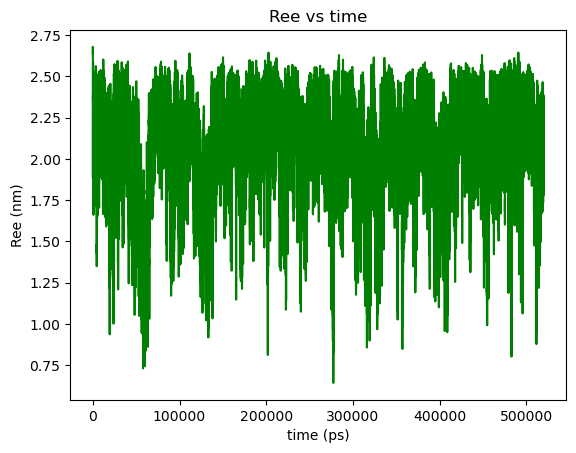

In [18]:
plt.plot(time, ree, color='green')

plt.title('Ree vs time')
plt.xlabel('time (ps)')
plt.ylabel('Ree (nm)')
plt.show()

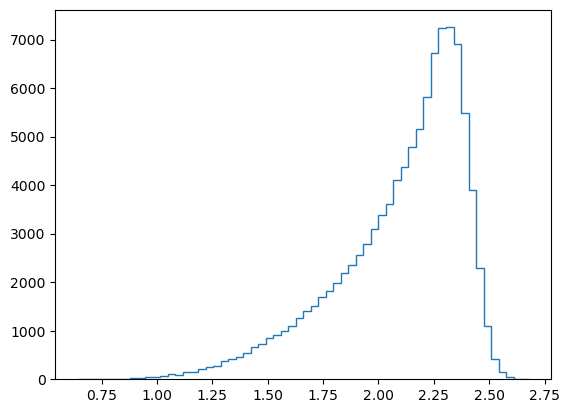

In [19]:
counts, bins = np.histogram(ree, 60)
plt.stairs(counts, bins)

# Rg

In [20]:
atoms_backbone = topology.select("backbone")

In [21]:
def get_Rg(xyz):
    
    n_atoms = xyz.shape[0]
    center = np.mean(xyz, axis=0)
    
    output = 0.0
    for ii in range(n_atoms):
        output += (xyz[ii,0]-center[0])**2 + (xyz[ii,1]-center[1])**2 + (xyz[ii,2]-center[2])**2
    
    output = output/n_atoms
    
    return output

In [22]:
traj.seek(0)

rg = []
time = []

for frame_index in tqdm(range(104000)):
    frame = traj.read(n_frames=1)
    rg.append(get_Rg(frame.coordinates[0, atoms_backbone, :]))
    time.append(frame.time[0])

100%|██████████| 104000/104000 [02:38<00:00, 655.72it/s]


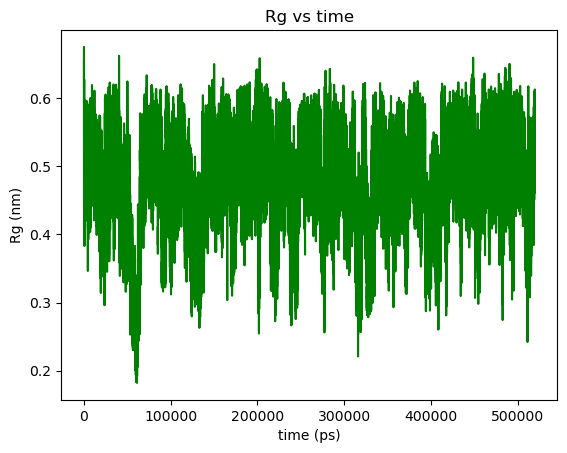

In [23]:
plt.plot(time, rg, color='green')

plt.title('Rg vs time')
plt.xlabel('time (ps)')
plt.ylabel('Rg (nm)')
plt.show()

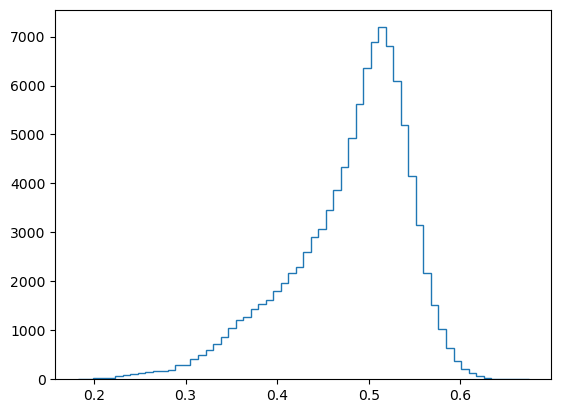

In [24]:
counts, bins = np.histogram(rg, 60)
plt.stairs(counts, bins)

# Ree vs Rg

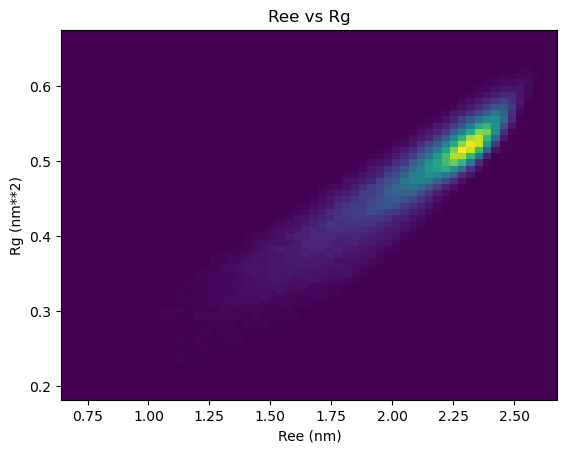

In [25]:
plt.hist2d(ree, rg, bins = (60, 60))

plt.title('Ree vs Rg')
plt.xlabel('Ree (nm)')
plt.ylabel('Rg (nm**2)')

plt.show()

# RMSD

In [26]:
atoms_backbone = topology.select("backbone")

In [27]:
pdb = md.load("hepta-L-Arg_solv.pdb")

In [28]:
ref_coordinates = pdb.xyz[0, atoms_backbone, :]

In [29]:
def get_RMSD(xyz, xyz_ref):
    
    n_atoms = xyz.shape[0]
    
    output = 0.0
    for ii in range(n_atoms):
        output += (xyz[ii,0]-xyz_ref[ii,0])**2 + \
                  (xyz[ii,1]-xyz_ref[ii,1])**2 + \
                  (xyz[ii,2]-xyz_ref[ii,2])**2
    
    output = np.sqrt(output/n_atoms)
    
    return output

In [30]:
traj.seek(0)

rmsd = []
time = []

for frame_index in tqdm(range(104000)):
    frame = traj.read(n_frames=1)
    rmsd.append(get_RMSD(frame.coordinates[0, atoms_backbone, :], ref_coordinates))
    time.append(frame.time[0])

100%|██████████| 104000/104000 [02:36<00:00, 663.38it/s]


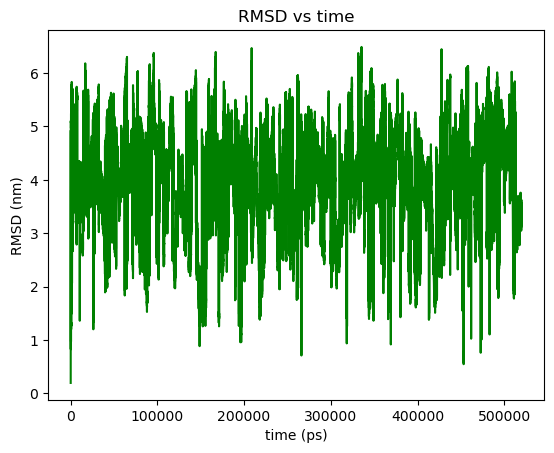

In [32]:
plt.plot(time, rmsd, color='green')

plt.title('RMSD vs time')
plt.xlabel('time (ps)')
plt.ylabel('RMSD (nm)')
plt.show()

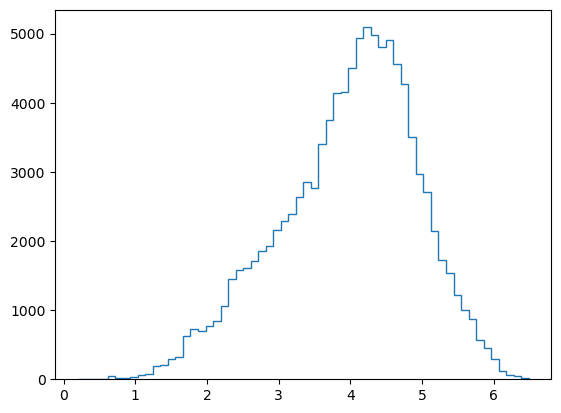

In [33]:
counts, bins = np.histogram(rmsd, 60)
plt.stairs(counts, bins)

# RMSD vs Rg

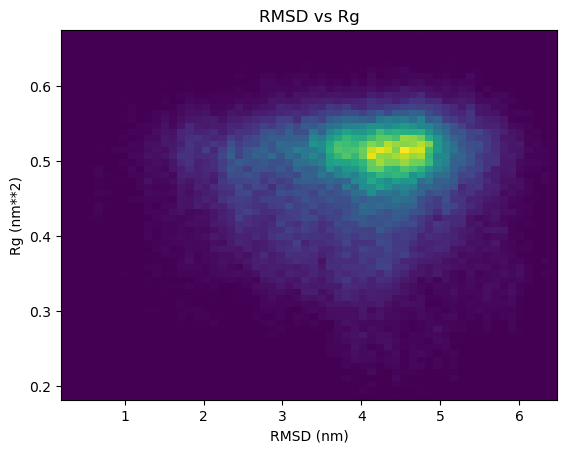

In [34]:
plt.hist2d(rmsd, rg, bins = (60, 60))

plt.title('RMSD vs Rg')
plt.xlabel('RMSD (nm)')
plt.ylabel('Rg (nm**2)')

plt.show()

# RMSD vs Ree

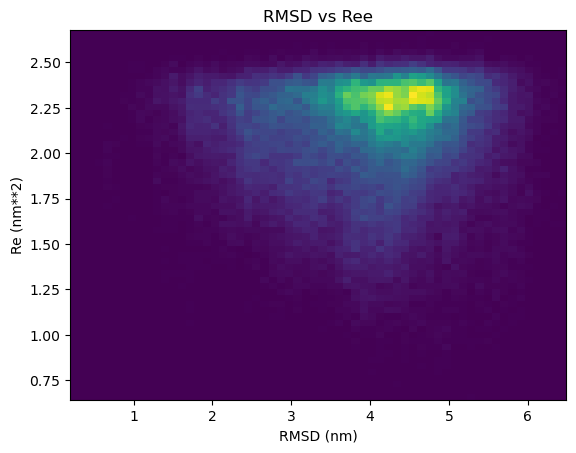

In [35]:
plt.hist2d(rmsd, ree, bins = (60, 60))

plt.title('RMSD vs Ree')
plt.xlabel('RMSD (nm)')
plt.ylabel('Re (nm**2)')

plt.show()

In [36]:
traj.close()